CODE BARU


In [ ]:
!pip install datasets scikit-learn

from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is in

LANGKAH 2

In [ ]:
# Load dataset dari Hugging Face
dataset = load_dataset("dair-ai/emotion")
train_data = dataset["train"]
test_data = dataset["test"]

# Ambil teks dan label
X_train = train_data["text"]
y_train = train_data["label"]
X_test = test_data["text"]
y_test = test_data["label"]

# Konversi label ke nama emosi
label_names = dataset["train"].features["label"].names


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

LANGKAH 3

In [ ]:
# TF-IDF vektorisasi
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

LANGKAH 4

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     sadness       0.67      0.90      0.77       581
         joy       0.60      0.99      0.75       695
        love       1.00      0.03      0.05       159
       anger       0.96      0.16      0.28       275
        fear       1.00      0.18      0.31       224
    surprise       0.00      0.00      0.00        66

    accuracy                           0.65      2000
   macro avg       0.71      0.38      0.36      2000
weighted avg       0.73      0.65      0.56      2000



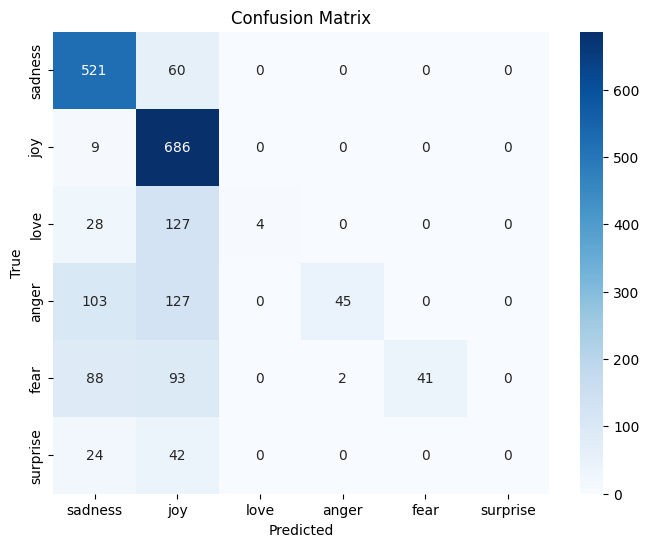

In [ ]:
# Prediksi dan laporan evaluasi
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred, target_names=label_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


CODE YANG DIMODIFIKASI


In [ ]:
# ✅ Install dependencies
!pip install datasets scikit-learn matplotlib seaborn nltk

# ✅ Import libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import re

# ✅ Unduh stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CODE PROCESSING

In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus karakter non-huruf
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)


DATASET & VISUALISASI

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

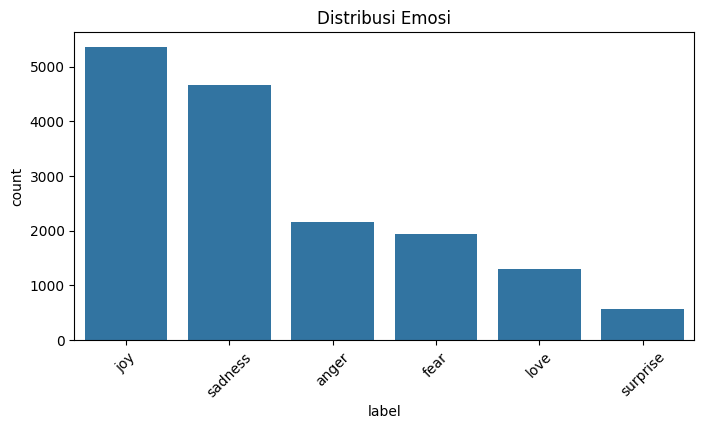

In [ ]:
# Muat dataset emosi dari Hugging Face
dataset = load_dataset("dair-ai/emotion")
label_names = dataset['train'].features['label'].names

# Preprocessing teks
X = [preprocess(t) for t in dataset['train']['text']]
y = dataset['train']['label']

# Visualisasi distribusi emosi
import pandas as pd
df = pd.DataFrame({'text': X, 'label': [label_names[i] for i in y]})
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title('Distribusi Emosi')
plt.xticks(rotation=45)
plt.show()


TRAIN MODEL

In [ ]:
# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF + Naive Bayes
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

EVAL MODEL

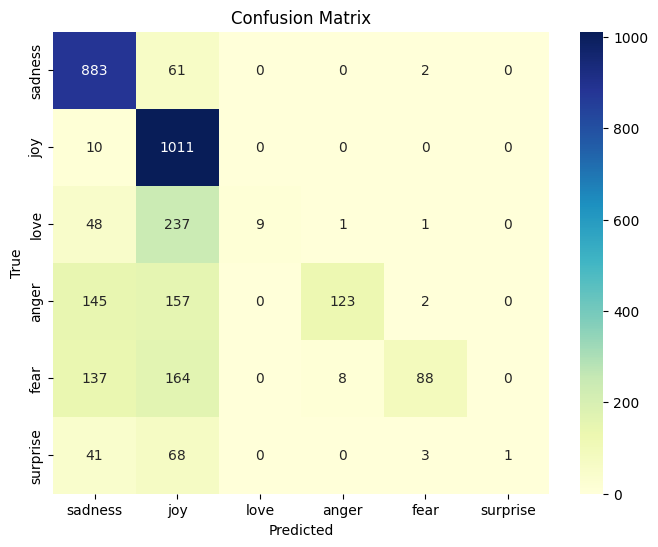

Accuracy: 0.6609375
              precision    recall  f1-score   support

     sadness       0.70      0.93      0.80       946
         joy       0.60      0.99      0.74      1021
        love       1.00      0.03      0.06       296
       anger       0.93      0.29      0.44       427
        fear       0.92      0.22      0.36       397
    surprise       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.41      0.40      3200
weighted avg       0.76      0.66      0.58      3200



In [ ]:
y_pred = model.predict(X_test_vec)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_names))


DEMO

In [1]:
def predict_emotion(text):
    cleaned = preprocess(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return label_names[pred]

# Uji demo
sample_text = input("Masukkan kalimat untuk dianalisis emosinya: ")
predicted_emotion = predict_emotion(sample_text)
print(f"Prediksi Emosi: {predicted_emotion}")


Masukkan kalimat untuk dianalisis emosinya: angry


NameError: name 'preprocess' is not defined

CODE BARU LAGI UHUYY

In [9]:
!pip install datasets scikit-learn matplotlib seaborn nltk

import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


PROCESSING

In [10]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

PETA EMOSI

In [11]:
label_map = {
    'sadness': ('Kesedihan', '😢'),
    'joy': ('Kebahagiaan', '😊'),
    'love': ('Cinta', '❤️'),
    'anger': ('Marah', '😠'),
    'fear': ('Takut', '😨'),
    'surprise': ('Terkejut', '😮')
}

DATASET & VISUALISASI

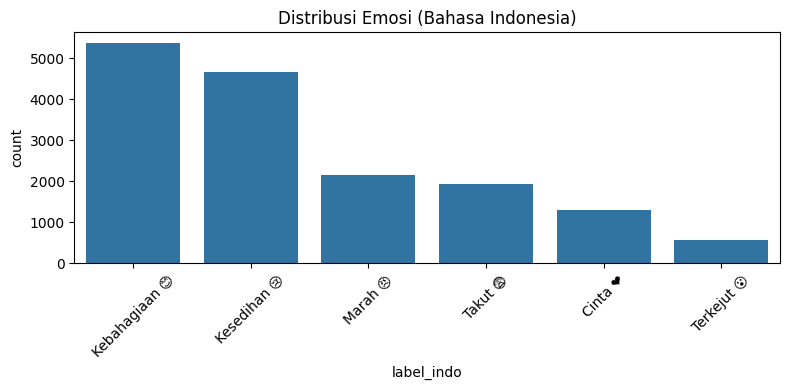

In [12]:
dataset = load_dataset("dair-ai/emotion")
label_names = dataset['train'].features['label'].names

X = [preprocess(t) for t in dataset['train']['text']]
y = dataset['train']['label']

df = pd.DataFrame({'text': X, 'label': [label_names[i] for i in y]})
df['label_indo'] = df['label'].map(lambda l: f"{label_map[l][0]} {label_map[l][1]}")

# Visualisasi distribusi
plt.figure(figsize=(8, 4))
sns.countplot(x='label_indo', data=df, order=df['label_indo'].value_counts().index)
plt.title("Distribusi Emosi (Bahasa Indonesia)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NAIVE BAYES TRAINING

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

EVALUASI MODEL

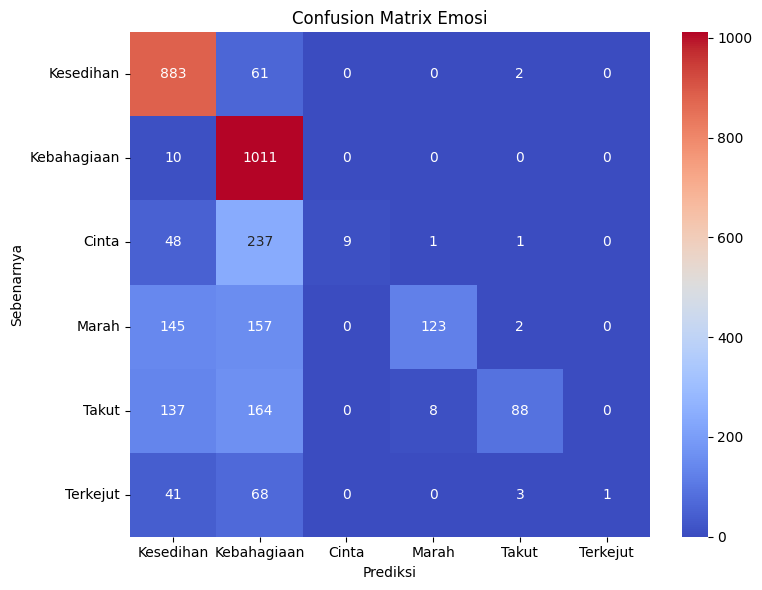

🎯 Akurasi Model: 66.09 %

📋 Laporan Klasifikasi:

              precision    recall  f1-score   support

   Kesedihan       0.70      0.93      0.80       946
 Kebahagiaan       0.60      0.99      0.74      1021
       Cinta       1.00      0.03      0.06       296
       Marah       0.93      0.29      0.44       427
       Takut       0.92      0.22      0.36       397
    Terkejut       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.41      0.40      3200
weighted avg       0.76      0.66      0.58      3200



In [14]:
y_pred = model.predict(X_test_vec)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=[label_map[l][0] for l in label_names],
            yticklabels=[label_map[l][0] for l in label_names],
            cmap="coolwarm")
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix Emosi")
plt.tight_layout()
plt.show()

# Akurasi dan laporan
print("🎯 Akurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📋 Laporan Klasifikasi:\n")
print(classification_report(y_test, y_pred, target_names=[label_map[l][0] for l in label_names]))

PREDIKSI INTERAKTIF

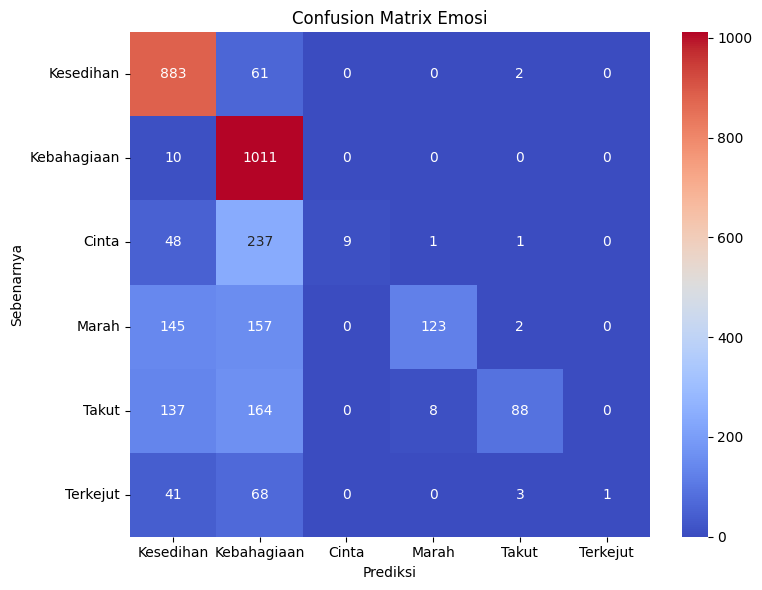

🎯 Akurasi Model: 66.09 %

📋 Laporan Klasifikasi:

              precision    recall  f1-score   support

   Kesedihan       0.70      0.93      0.80       946
 Kebahagiaan       0.60      0.99      0.74      1021
       Cinta       1.00      0.03      0.06       296
       Marah       0.93      0.29      0.44       427
       Takut       0.92      0.22      0.36       397
    Terkejut       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.41      0.40      3200
weighted avg       0.76      0.66      0.58      3200



In [15]:
y_pred = model.predict(X_test_vec)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=[label_map[l][0] for l in label_names],
            yticklabels=[label_map[l][0] for l in label_names],
            cmap="coolwarm")
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix Emosi")
plt.tight_layout()
plt.show()

# Akurasi dan laporan
print("🎯 Akurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📋 Laporan Klasifikasi:\n")
print(classification_report(y_test, y_pred, target_names=[label_map[l][0] for l in label_names]))